In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Adanit.csv',index_col=['Dates'])
df['Curr_DT']=df.index
df['Curr_DT'] = pd.to_datetime(df["Curr_DT"])
df['Next_Close']=df['Close'].shift(1)
df['Next_Close_15']=df['Close'].shift(3)
df['Next_Close_30']=df['Close'].shift(6)
df['Next_DT']=df['Curr_DT'].shift(6)
df['Change_in_Vol']=df['Volume'].diff(periods=1)
df['Change_in_Price']=df['Close'].diff(periods=1)
df=df.dropna()
df

,Open,Close,Volume,Curr_DT,Next_Close,Next_Close_15,Next_Close_30,Next_DT,Change_in_Vol,Change_in_Price
Dates,,,,,,,,,,
15-12-2022 12:40,2646.50,2646.05,255.0,2022-12-15 12:40:00,2649.40,2646.70,2654.85,2022-12-15 13:10:00,-138.0,-3.35
15-12-2022 12:35,2648.95,2645.60,1301.0,2022-12-15 12:35:00,2646.05,2648.90,2653.00,2022-12-15 13:05:00,1046.0,-0.45
15-12-2022 12:30,2649.80,2648.85,400.0,2022-12-15 12:30:00,2645.60,2649.40,2650.00,2022-12-15 13:00:00,-901.0,3.25
15-12-2022 12:25,2649.95,2649.85,1166.0,2022-12-15 12:25:00,2648.85,2646.05,2646.70,2022-12-15 12:55:00,766.0,1.00
15-12-2022 12:20,2649.50,2649.00,1631.0,2022-12-15 12:20:00,2649.85,2645.60,2648.90,2022-12-15 12:50:00,465.0,-0.85
...,...,...,...,...,...,...,...,...,...,...
15-11-2022 09:30,3268.60,3277.00,8904.0,2022-11-15 09:30:00,3292.80,3289.00,3291.35,2022-11-15 10:00:00,-1455.0,-15.80
15-11-2022 09:25,3274.10,3268.55,9327.0,2022-11-15 09:25:00,3277.00,3292.45,3290.75,2022-11-15 09:55:00,423.0,-8.45
15-11-2022 09:20,3281.10,3274.10,4931.0,2022-11-15 09:20:00,3268.55,3292.80,3294.80,2022-11-15 09:50:00,-4396.0,5.55


In [3]:
df['diff'] = df['Next_DT']-df['Curr_DT']
df['minutes'] = df['diff'].dt.total_seconds()/60
mask=df['minutes']==30
df=df.loc[mask]
df.drop(['diff','minutes','Curr_DT','Next_DT'],axis=1,inplace=True)
df

,Open,Close,Volume,Next_Close,Next_Close_15,Next_Close_30,Change_in_Vol,Change_in_Price
Dates,,,,,,,,
15-12-2022 12:40,2646.50,2646.05,255.0,2649.40,2646.70,2654.85,-138.0,-3.35
15-12-2022 12:35,2648.95,2645.60,1301.0,2646.05,2648.90,2653.00,1046.0,-0.45
15-12-2022 12:30,2649.80,2648.85,400.0,2645.60,2649.40,2650.00,-901.0,3.25
15-12-2022 12:25,2649.95,2649.85,1166.0,2648.85,2646.05,2646.70,766.0,1.00
15-12-2022 12:20,2649.50,2649.00,1631.0,2649.85,2645.60,2648.90,465.0,-0.85
...,...,...,...,...,...,...,...,...
15-11-2022 09:35,3277.45,3292.80,10359.0,3292.45,3294.80,3292.35,-4324.0,0.35
15-11-2022 09:30,3268.60,3277.00,8904.0,3292.80,3289.00,3291.35,-1455.0,-15.80
15-11-2022 09:25,3274.10,3268.55,9327.0,3277.00,3292.45,3290.75,423.0,-8.45


In [4]:
import talib
from talib import MA_Type

In [5]:
upper, middle, lower = talib.BBANDS(df['Close'], matype=MA_Type.T3)
bbp = (df['Close'] - lower) / (upper - lower)
df['BB_up']=upper
df['BB_low']=lower
df['BBP']=bbp
rsi = talib.RSI(df['Close'], timeperiod=14)
df['RSI']=rsi
df.drop(['BB_up','BB_low'],axis=1,inplace=True)
df=df.dropna()
df

,Open,Close,Volume,Next_Close,Next_Close_15,Next_Close_30,Change_in_Vol,Change_in_Price,BBP,RSI
Dates,,,,,,,,,,
15-12-2022 10:40,2645.80,2641.05,1849.0,2639.90,2640.30,2648.85,-4067.0,1.15,0.519777,43.943151
15-12-2022 10:35,2648.45,2645.85,1536.0,2641.05,2639.20,2648.00,-313.0,4.80,1.002957,52.987081
15-12-2022 10:30,2649.25,2647.45,771.0,2645.85,2639.90,2639.25,-765.0,1.60,0.908828,55.560783
15-12-2022 10:25,2648.00,2649.25,1071.0,2647.45,2641.05,2640.30,300.0,1.80,0.891937,58.324891
15-12-2022 10:20,2648.00,2647.25,1544.0,2649.25,2645.85,2639.20,473.0,-2.00,0.699683,54.284645
...,...,...,...,...,...,...,...,...,...,...
15-11-2022 09:35,3277.45,3292.80,10359.0,3292.45,3294.80,3292.35,-4324.0,0.35,0.589597,56.395220
15-11-2022 09:30,3268.60,3277.00,8904.0,3292.80,3289.00,3291.35,-1455.0,-15.80,-0.025315,37.289391
15-11-2022 09:25,3274.10,3268.55,9327.0,3277.00,3292.45,3290.75,423.0,-8.45,0.032587,31.201306


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [12]:
open=np.array(df['Open']).reshape((-1,1))
close=np.array(df['Close']).reshape((-1,1))
volume=np.array(df['Volume']).reshape((-1,1))
next_close=np.array(df['Next_Close']).reshape((-1,1))
next_close_15=np.array(df['Next_Close_15']).reshape((-1,1))
next_close_30=np.array(df['Next_Close_30']).reshape((-1,1))
pchg=np.array(df['Change_in_Price']).reshape((-1,1))
vchg=np.array(df['Change_in_Vol']).reshape((-1,1))
bbp=np.array(df['BBP']).reshape((-1,1))
rsi=np.array(df['RSI']).reshape((-1,1))

In [8]:
#Model1
t=0.8
t = int(t*len(df))
X1=close
y1=next_close
X1_train=X1[:t]
y1_train=y1[:t]
X1_test=X1[t:]
y1_test=y1[t:]

In [9]:
# Create a linear regression model
linear = LinearRegression().fit(X1_train, y1_train)
print("Linear Regression model")
print("Close after 5 mins(y) = %.2f * Close(x1) \
+ %.2f (constant)" % (linear.coef_[0],linear.intercept_))

Linear Regression model
Close after 5 mins(y) = 0.99 * Close(x1) + 14.14 (constant)


In [10]:
pred_train= linear.predict(X1_train)
pred_test= linear.predict(X1_test)
from math import sqrt
from sklearn.metrics import mean_squared_error
mse1_train = mean_squared_error(y1_train,pred_train)
mse1_test = mean_squared_error(y1_test,pred_test)
print("train loss",mse1_train)
print("test loss",mse1_test)

train loss 35.77579797137519
test loss 41.14855018323389


In [11]:
#Model2
t=0.8
t = int(t*len(df))
X2=np.hstack((close,open))
y2=next_close
X2_train=X2[:t]
y2_train=y2[:t]
X2_test=X2[t:]
y2_test=y2[t:]

In [12]:
model2 = Sequential()
model2.add(Dense(100,input_shape=(None,2)))
model2.add(Dense(128))
model2.add(Dense(1))
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 100)         300       
                                                                 
 dense_1 (Dense)             (None, None, 128)         12928     
                                                                 
 dense_2 (Dense)             (None, None, 1)           129       
                                                                 
Total params: 13,357
Trainable params: 13,357
Non-trainable params: 0
_________________________________________________________________
None


In [14]:

# batch_size = 32
# earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

# # reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1,mode='min')

# model2.fit(X2_train, y2_train, batch_size=batch_size, epochs=50, verbose=0, callbacks=[earlyStopping, mcp_save], validation_split=0.25)

In [17]:
model2.compile(optimizer = 'adam', loss = 'mse')
mcp_save = ModelCheckpoint('model2-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#model2.fit(X2_train,y2_train,epochs = 100,validation_split = 0.1,batch_size=16)
model2.fit(X2_train,y2_train,epochs = 100,validation_split = 0.1,batch_size=16,callbacks=mcp_save)

Epoch 1/100
70/70 [==============================] - 1s 4ms/step - loss: 15740.1504 - val_loss: 87.9330
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 60.8713 - val_loss: 69.1325
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 48.7513 - val_loss: 52.8508
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 52.6486 - val_loss: 67.7054
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 55.2467 - val_loss: 60.7632
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 51.6285 - val_loss: 41.4912
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 62.6246 - val_loss: 39.4085
Epoch 8/100
70/70 [==============================] - 0s 3ms/step - loss: 57.5023 - val_loss: 59.4540
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 56.6270 - val_loss: 43.7673
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 59.3226 - val_

In [18]:
mse2_train = model2.evaluate(X2_train, y2_train)
mse2_test = model2.evaluate(X2_test, y2_test)
print("train loss",mse2_train)
print("test loss",mse2_test)

10/10 [==============================] - 0s 1ms/step - loss: 39.4242
train loss 39.162254333496094
test loss 39.424198150634766


In [19]:
#Model3
t=0.8
t = int(t*len(df))
X3=np.hstack((close,open,volume))
y3=next_close
X3_train=X3[:t]
y3_train=y3[:t]
X3_test=X3[t:]
y3_test=y3[t:]

In [20]:
model3 = Sequential()
model3.add(Dense(100,input_shape=(None,3)))
model3.add(Dense(128))
model3.add(Dense(1))
print(model3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 100)         400       
                                                                 
 dense_4 (Dense)             (None, None, 128)         12928     
                                                                 
 dense_5 (Dense)             (None, None, 1)           129       
                                                                 
Total params: 13,457
Trainable params: 13,457
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
model3.compile(optimizer = 'adam', loss = 'mse')
mcp_save = ModelCheckpoint('model3-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#model3.fit(X3_train,y3_train,epochs = 100,validation_split = 0.1,batch_size=16)
model3.fit(X3_train,y3_train,epochs = 10,validation_split = 0.1,batch_size=16,callbacks=mcp_save)

Epoch 1/10
70/70 [==============================] - 1s 5ms/step - loss: 648.0166 - val_loss: 231.1807
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 68.6265 - val_loss: 52.2457
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 840.1227 - val_loss: 80.8665
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 105.7688 - val_loss: 122.6726
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 85.0871 - val_loss: 573.3004
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 175.5935 - val_loss: 88.0486
Epoch 7/10
70/70 [==============================] - 0s 3ms/step - loss: 1192.6841 - val_loss: 1507.5122
Epoch 8/10
70/70 [==============================] - 0s 2ms/step - loss: 761.9938 - val_loss: 56.1658
Epoch 9/10
70/70 [==============================] - 0s 3ms/step - loss: 322.6315 - val_loss: 758.3624
Epoch 10/10
70/70 [==============================] - 0s 3ms/step - loss: 287.0396 - va

In [72]:
mse3_train = model3.evaluate(X3_train, y3_train)
mse3_test = model3.evaluate(X3_test, y3_test)
print("train loss",mse3_train)
print("test loss",mse3_test)

10/10 [==============================] - 0s 1ms/step - loss: 44.8011
train loss 48.11674118041992
test loss 44.80111312866211


In [13]:
#Model4
t=0.8
t = int(t*len(df))
X4=np.hstack((close,pchg))
y4=next_close
X4_train=X4[:t]
y4_train=y4[:t]
X4_test=X4[t:]
y4_test=y4[t:]

In [14]:
model4 = Sequential()
model4.add(Dense(100,input_shape=(None,2)))
model4.add(Dense(128))
model4.add(Dense(1))
print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 100)         300       
                                                                 
 dense_4 (Dense)             (None, None, 128)         12928     
                                                                 
 dense_5 (Dense)             (None, None, 1)           129       
                                                                 
Total params: 13,357
Trainable params: 13,357
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model4.compile(optimizer = 'adam', loss = 'mse')
mcp_save = ModelCheckpoint('model4-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#model3.fit(X3_train,y3_train,epochs = 100,validation_split = 0.1,batch_size=16)
model4.fit(X4_train,y4_train,epochs = 15,validation_split = 0.1,batch_size=16,callbacks=mcp_save)

Epoch 1/15
70/70 [==============================] - 1s 4ms/step - loss: 13607.4805 - val_loss: 70.2852
Epoch 2/15
70/70 [==============================] - 0s 3ms/step - loss: 12.0633 - val_loss: 1.5510
Epoch 3/15
70/70 [==============================] - 0s 2ms/step - loss: 1.9377 - val_loss: 3.5143
Epoch 4/15
70/70 [==============================] - 0s 2ms/step - loss: 0.9204 - val_loss: 0.4824
Epoch 5/15
70/70 [==============================] - 0s 3ms/step - loss: 0.5958 - val_loss: 0.3075
Epoch 6/15
70/70 [==============================] - 0s 3ms/step - loss: 0.2494 - val_loss: 0.1559
Epoch 7/15
70/70 [==============================] - 0s 4ms/step - loss: 0.1721 - val_loss: 0.1535
Epoch 8/15
70/70 [==============================] - 0s 4ms/step - loss: 0.1049 - val_loss: 0.0350
Epoch 9/15
70/70 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.0143
Epoch 10/15
70/70 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0099
Epoch 11/15
7

In [18]:
mse4_train = model4.evaluate(X4_train, y4_train)
mse4_test = model4.evaluate(X4_test, y4_test)
print("train loss",mse4_train)
print("test loss",mse4_test)

10/10 [==============================] - 0s 1ms/step - loss: 7.7880e-04
train loss 0.0001169120441772975
test loss 0.0007787988870404661


In [32]:
#Model5
t=0.8
t = int(t*len(df))
X5=np.hstack((close,open,pchg))
y5=next_close
X5_train=X5[:t]
y5_train=y5[:t]
X5_test=X5[t:]
y5_test=y5[t:]

In [33]:
model5 = Sequential()
model5.add(Dense(100,input_shape=(None,3)))
model5.add(Dense(128))
model5.add(Dense(1))
print(model5.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, None, 100)         400       
                                                                 
 dense_10 (Dense)            (None, None, 128)         12928     
                                                                 
 dense_11 (Dense)            (None, None, 1)           129       
                                                                 
Total params: 13,457
Trainable params: 13,457
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
model5.compile(optimizer = 'adam', loss = 'mse')
mcp_save = ModelCheckpoint('model5-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#model3.fit(X3_train,y3_train,epochs = 100,validation_split = 0.1,batch_size=16)
model5.fit(X5_train,y5_train,epochs = 20,validation_split = 0.1,batch_size=16,callbacks=mcp_save)

Epoch 1/20
70/70 [==============================] - 1s 5ms/step - loss: 6430.1206 - val_loss: 35.0410
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 9.7229 - val_loss: 4.4724
Epoch 3/20
70/70 [==============================] - 0s 2ms/step - loss: 5.5471 - val_loss: 9.0399
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 4.8567 - val_loss: 3.1458
Epoch 5/20
70/70 [==============================] - 0s 2ms/step - loss: 4.7648 - val_loss: 4.6737
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 2.8150 - val_loss: 3.0126
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 2.1098 - val_loss: 2.0791
Epoch 8/20
70/70 [==============================] - 0s 3ms/step - loss: 1.4105 - val_loss: 1.4244
Epoch 9/20
70/70 [==============================] - 0s 3ms/step - loss: 1.5312 - val_loss: 0.9577
Epoch 10/20
70/70 [==============================] - 0s 3ms/step - loss: 1.0166 - val_loss: 0.5041
Epoch 11/20
70/

In [50]:
mse5_train = model5.evaluate(X5_train, y5_train)
mse5_test = model5.evaluate(X5_test, y5_test)
print("train loss",mse5_train)
print("test loss",mse5_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0016
train loss 0.001128018251620233
test loss 0.0015555963618680835


In [38]:
#Model6
t=0.8
t = int(t*len(df))
X6=np.hstack((close,pchg,rsi,bbp))
y6=next_close
X6_train=X6[:t]
y6_train=y6[:t]
X6_test=X6[t:]
y6_test=y6[t:]

In [39]:
model6 = Sequential()
model6.add(Dense(100,input_shape=(None,4)))
model6.add(Dense(128))
model6.add(Dense(1))
print(model6.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, None, 100)         500       
                                                                 
 dense_13 (Dense)            (None, None, 128)         12928     
                                                                 
 dense_14 (Dense)            (None, None, 1)           129       
                                                                 
Total params: 13,557
Trainable params: 13,557
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model6.compile(optimizer = 'adam', loss = 'mse')
mcp_save = ModelCheckpoint('model6-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#model3.fit(X3_train,y3_train,epochs = 100,validation_split = 0.1,batch_size=16)
model6.fit(X6_train,y6_train,epochs = 10,validation_split = 0.1,batch_size=16,callbacks=mcp_save)

Epoch 1/10
70/70 [==============================] - 1s 6ms/step - loss: 10511.2109 - val_loss: 114.7998
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 8.6509 - val_loss: 0.0895
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 0.0220
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.0151
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0052
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 7/10
70/70 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/10
70/70 [==============================] - 0s 3ms/step - loss: 9.1024e-04 - val_loss: 6.2427e-04
Epoch 9/10
70/70 [==============================] - 0s 3ms/step - loss: 5.6638e-04 - val_loss: 8.2811e-04
Epoch 10/10
70/70 [==============================] - 0s 3ms/step - loss: 4.3584e-04 - val_loss: 

In [44]:
mse6_train = model6.evaluate(X6_train, y6_train)
mse6_test = model6.evaluate(X6_test, y6_test)
print("train loss",mse6_train)
print("test loss",mse6_test)

10/10 [==============================] - 0s 1ms/step - loss: 2.4411e-04
train loss 0.00025204342091456056
test loss 0.00024410623882431537


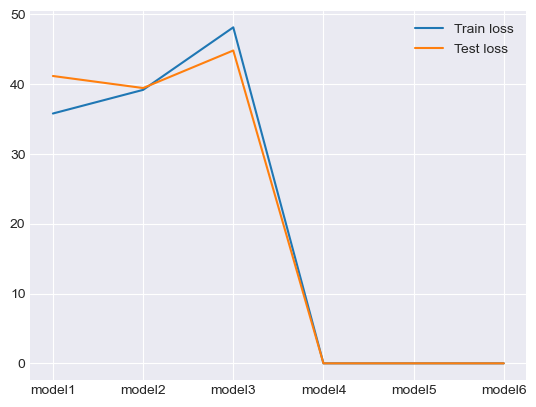

In [73]:
x = np.array([1,2,3,4,5,6])
y1 = np.array([mse1_train,mse2_train,mse3_train,mse4_train,mse5_train,mse6_train])
y2 = np.array([mse1_test,mse2_test,mse3_test,mse4_test,mse5_test,mse6_test])
my_xticks = ['model1','model2','model3','model4','model5','model6']
plt.xticks(x, my_xticks)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(['Train loss','Test loss'])
plt.show()

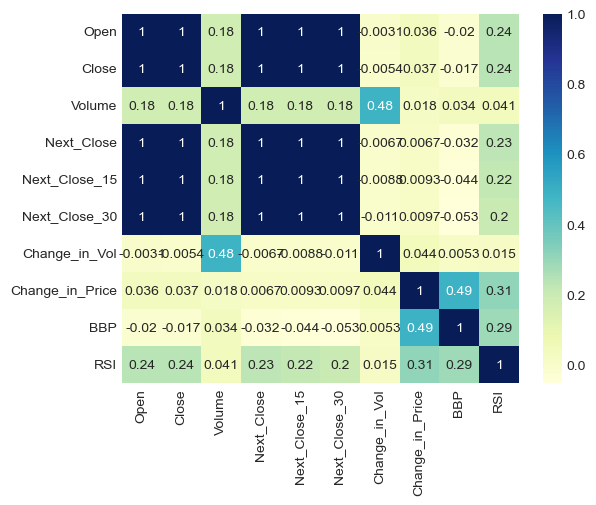

In [74]:
#So I found out that model4 is the best and model6 is the 2nd best
#Volume correlation with this is very bad
# plotting correlation heatmap
import seaborn as sb
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
# Now its time for classification, dont forget to normalise the inputs

In [19]:
pred_5=model4.predict(X4)

49/49 [==============================] - 0s 2ms/step


In [20]:
pred_5.shape

(1557, 1)

In [77]:
#Model7
t=0.8
t = int(t*len(df))
X7=np.hstack((close,pchg,pred_5))
y7=next_close_15
X7_train=X7[:t]
y7_train=y7[:t]
X7_test=X7[t:]
y7_test=y7[t:]

In [78]:
model7 = Sequential()
model7.add(Dense(100,input_shape=(None,3)))
model7.add(Dense(128))
model7.add(Dense(1))
print(model7.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, None, 100)         400       
                                                                 
 dense_16 (Dense)            (None, None, 128)         12928     
                                                                 
 dense_17 (Dense)            (None, None, 1)           129       
                                                                 
Total params: 13,457
Trainable params: 13,457
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
model7.compile(optimizer = 'adam', loss = 'mse')
mcp_save = ModelCheckpoint('model7-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#model3.fit(X3_train,y3_train,epochs = 100,validation_split = 0.1,batch_size=16)
model7.fit(X7_train,y7_train,epochs = 10,validation_split = 0.1,batch_size=16,callbacks=mcp_save)

Epoch 1/10
70/70 [==============================] - 2s 4ms/step - loss: 238978.4062 - val_loss: 2466.1096
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 232.8731 - val_loss: 251.3604
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 83.3410 - val_loss: 269.4330
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 82.5035 - val_loss: 256.6809
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 77.1975 - val_loss: 240.0480
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 77.7115 - val_loss: 270.8750
Epoch 7/10
70/70 [==============================] - 0s 3ms/step - loss: 81.5031 - val_loss: 243.3087
Epoch 8/10
70/70 [==============================] - 0s 3ms/step - loss: 74.0495 - val_loss: 225.8843
Epoch 9/10
70/70 [==============================] - 0s 2ms/step - loss: 75.7310 - val_loss: 227.2012
Epoch 10/10
70/70 [==============================] - 0s 3ms/step - loss: 79.0547 - va

In [80]:
mse7_train = model7.evaluate(X7_train, y7_train)
mse7_test = model7.evaluate(X7_test, y7_test)
print("train loss",mse7_train)
print("test loss",mse7_test)

10/10 [==============================] - 0s 2ms/step - loss: 78.6562
train loss 81.50853729248047
test loss 78.65621948242188


In [81]:
pred_15=model7.predict(X7)

49/49 [==============================] - 0s 2ms/step


In [82]:
#Model8
t=0.8
t = int(t*len(df))
X8=np.hstack((close,pchg,pred_5,pred_15))
y8=next_close_30
X8_train=X8[:t]
y8_train=y8[:t]
X8_test=X8[t:]
y8_test=y8[t:]

In [83]:
model8 = Sequential()
model8.add(Dense(100,input_shape=(None,4)))
model8.add(Dense(128))
model8.add(Dense(1))
print(model8.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, None, 100)         500       
                                                                 
 dense_19 (Dense)            (None, None, 128)         12928     
                                                                 
 dense_20 (Dense)            (None, None, 1)           129       
                                                                 
Total params: 13,557
Trainable params: 13,557
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
model8.compile(optimizer = 'adam', loss = 'mse')
mcp_save = ModelCheckpoint('model8-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#model3.fit(X3_train,y3_train,epochs = 100,validation_split = 0.1,batch_size=16)
model8.fit(X8_train,y8_train,epochs = 20,validation_split = 0.1,batch_size=16,callbacks=mcp_save)

Epoch 1/20
70/70 [==============================] - 1s 4ms/step - loss: 43842.9688 - val_loss: 526.5542
Epoch 2/20
70/70 [==============================] - 0s 2ms/step - loss: 211.0549 - val_loss: 452.8599
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 160.4012 - val_loss: 424.9643
Epoch 4/20
70/70 [==============================] - 0s 2ms/step - loss: 192.3937 - val_loss: 465.7734
Epoch 5/20
70/70 [==============================] - 0s 4ms/step - loss: 187.9249 - val_loss: 397.5738
Epoch 6/20
70/70 [==============================] - 0s 2ms/step - loss: 182.0432 - val_loss: 535.0131
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 195.2181 - val_loss: 428.0003
Epoch 8/20
70/70 [==============================] - 0s 2ms/step - loss: 195.0048 - val_loss: 506.5601
Epoch 9/20
70/70 [==============================] - 0s 3ms/step - loss: 171.4866 - val_loss: 393.3156
Epoch 10/20
70/70 [==============================] - 0s 2ms/step - loss: 250.015

In [87]:
mse8_train = model8.evaluate(X8_train, y8_train)
mse8_test = model8.evaluate(X8_test, y8_test)
print("train loss",mse8_train)
print("test loss",mse8_test)

10/10 [==============================] - 0s 1ms/step - loss: 223.1739
train loss 222.65863037109375
test loss 223.17385864257812


In [88]:
pred_30=model8.predict(X8)

49/49 [==============================] - 0s 2ms/step


In [21]:
#Model9
t=0.8
t = int(t*len(df))
X9=np.hstack((close,pchg))
y9=next_close_30
X9_train=X9[:t]
y9_train=y9[:t]
X9_test=X9[t:]
y9_test=y9[t:]

In [22]:
model9 = Sequential()
model9.add(Dense(100,input_shape=(None,2)))
model9.add(Dense(128))
model9.add(Dense(1))
print(model9.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, None, 100)         300       
                                                                 
 dense_7 (Dense)             (None, None, 128)         12928     
                                                                 
 dense_8 (Dense)             (None, None, 1)           129       
                                                                 
Total params: 13,357
Trainable params: 13,357
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
model9.compile(optimizer = 'adam', loss = 'mse')
mcp_save = ModelCheckpoint('model9-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#model3.fit(X3_train,y3_train,epochs = 100,validation_split = 0.1,batch_size=16)
model9.fit(X9_train,y9_train,epochs = 15,validation_split = 0.1,batch_size=16,callbacks=mcp_save)

Epoch 1/15
70/70 [==============================] - 1s 4ms/step - loss: 8756.9912 - val_loss: 576.9256
Epoch 2/15
70/70 [==============================] - 0s 3ms/step - loss: 182.4349 - val_loss: 419.9789
Epoch 3/15
70/70 [==============================] - 0s 2ms/step - loss: 168.7291 - val_loss: 543.0953
Epoch 4/15
70/70 [==============================] - 0s 2ms/step - loss: 177.2696 - val_loss: 433.4006
Epoch 5/15
70/70 [==============================] - 0s 3ms/step - loss: 172.0410 - val_loss: 391.4465
Epoch 6/15
70/70 [==============================] - 0s 2ms/step - loss: 226.0588 - val_loss: 394.4240
Epoch 7/15
70/70 [==============================] - 0s 3ms/step - loss: 173.3316 - val_loss: 399.2085
Epoch 8/15
70/70 [==============================] - 0s 3ms/step - loss: 183.0563 - val_loss: 396.4747
Epoch 9/15
70/70 [==============================] - 0s 2ms/step - loss: 247.4413 - val_loss: 1220.5822
Epoch 10/15
70/70 [==============================] - 0s 2ms/step - loss: 222.999

In [32]:
mse9_train = model9.evaluate(X9_train, y9_train)
mse9_test = model9.evaluate(X9_test, y9_test)
print("train loss",mse9_train)
print("test loss",mse9_test)

10/10 [==============================] - 0s 1ms/step - loss: 159.0747
train loss 172.10414123535156
test loss 159.07473754882812


In [33]:
pred_30_new=model9.predict(X9)

49/49 [==============================] - 0s 2ms/step


In [34]:
df.drop(['Open','Volume','Change_in_Vol','Change_in_Price','BBP','RSI'],axis=1,inplace=True)

In [35]:
print(mse8_train,mse8_test)
print(mse9_train,mse9_test)
#Choose whichever is better

172.10414123535156 159.07473754882812


In [36]:
df['Pred_Close_5']=pred_5
df['Pred_Close_30']=pred_30_new #or pred_30 if model 8 is better

In [37]:
df

,Close,Next_Close,Next_Close_15,Next_Close_30,Pred_Close_5,Pred_Close_30
Dates,,,,,,
15-12-2022 10:40,2641.05,2639.90,2640.30,2648.85,2639.895996,2640.845703
15-12-2022 10:35,2645.85,2641.05,2639.20,2648.00,2641.048584,2642.474121
15-12-2022 10:30,2647.45,2645.85,2639.90,2639.25,2645.846436,2646.855957
15-12-2022 10:25,2649.25,2647.45,2641.05,2640.30,2647.446289,2648.482910
15-12-2022 10:20,2647.25,2649.25,2645.85,2639.20,2649.244141,2649.785645
...,...,...,...,...,...,...
15-11-2022 09:35,3292.80,3292.45,3294.80,3292.35,3292.418701,3293.452637
15-11-2022 09:30,3277.00,3292.80,3289.00,3291.35,3292.760498,3291.687988
15-11-2022 09:25,3268.55,3277.00,3292.45,3290.75,3276.964844,3276.846680


In [38]:
df['Pred_Returns']=(df['Pred_Close_30']-df['Close'])/df['Close']*100
df['Ac_Returns']=(df['Next_Close_30']-df['Close'])/df['Close']*100
df['Predicted_Label']=0
df['True_Label']=0

In [39]:
# print(np.count_nonzero((df['Pred_Returns']>=0.5)&(df['Ac_Returns']>=0.5)))
# print(np.count_nonzero((df['Pred_Returns']<=-0.5)&(df['Ac_Returns']<=-0.5)))

In [40]:
df['Predicted_Label'][df['Pred_Returns'] >= 0.5] = 1
df['Predicted_Label'][df['Pred_Returns'] <= -0.5] = -1
df['True_Label'][df['Ac_Returns'] >= 0.5] = 1
df['True_Label'][df['Ac_Returns'] <= -0.5] = -1
df

,Close,Next_Close,Next_Close_15,Next_Close_30,Pred_Close_5,Pred_Close_30,Pred_Returns,Ac_Returns,Predicted_Label,True_Label
Dates,,,,,,,,,,
15-12-2022 10:40,2641.05,2639.90,2640.30,2648.85,2639.895996,2640.845703,-0.007735,0.295337,0,0
15-12-2022 10:35,2645.85,2641.05,2639.20,2648.00,2641.048584,2642.474121,-0.127591,0.081259,0,0
15-12-2022 10:30,2647.45,2645.85,2639.90,2639.25,2645.846436,2646.855957,-0.022438,-0.309732,0,0
15-12-2022 10:25,2649.25,2647.45,2641.05,2640.30,2647.446289,2648.482910,-0.028955,-0.337831,0,0
15-12-2022 10:20,2647.25,2649.25,2645.85,2639.20,2649.244141,2649.785645,0.095784,-0.304089,0,0
...,...,...,...,...,...,...,...,...,...,...
15-11-2022 09:35,3292.80,3292.45,3294.80,3292.35,3292.418701,3293.452637,0.019820,-0.013666,0,0
15-11-2022 09:30,3277.00,3292.80,3289.00,3291.35,3292.760498,3291.687988,0.448214,0.437901,0,0
15-11-2022 09:25,3268.55,3277.00,3292.45,3290.75,3276.964844,3276.846680,0.253834,0.679200,0,1


In [41]:
pred_label=np.array(df['Predicted_Label'])
true_label=np.array(df['True_Label'])

In [42]:
a=np.count_nonzero(pred_label==true_label)

In [43]:
acc=a/len(df)
acc

0.8458574181117534

In [44]:
df1=df[df['Predicted_Label']!=0] #For those trades which we buy or sell

In [45]:
df1.drop(['Next_Close','Next_Close_15','Pred_Close_5','Pred_Returns','True_Label'],axis=1,inplace=True)

In [46]:
df1= df1.loc[::-1]

In [47]:
df1['Profit_Returns']=df1['Ac_Returns']*df1['Predicted_Label']

In [48]:
#Now I have to remove the overlapping time intervals i.e 1 trade in 30 minutes only
df1['Dates']=df1.index
df1['time'] = pd.to_datetime(df1['Dates'])
df1['mins']=(df1['time']-df1['time'][0]).dt.total_seconds()/60
df1

,Close,Next_Close_30,Pred_Close_30,Ac_Returns,Predicted_Label,Profit_Returns,Dates,time,mins
Dates,,,,,,,,,
16-11-2022 14:55,3289.95,3268.00,3273.171631,-0.667183,-1,0.667183,16-11-2022 14:55,2022-11-16 14:55:00,0.0
17-11-2022 14:10,3205.95,3163.20,3177.372070,-1.333458,-1,1.333458,17-11-2022 14:10,2022-11-17 14:10:00,1395.0
17-11-2022 15:00,3162.15,3117.55,3144.645020,-1.410433,-1,1.410433,17-11-2022 15:00,2022-11-17 15:00:00,1445.0
18-11-2022 09:15,3140.60,3087.80,3123.698486,-1.681207,-1,1.681207,18-11-2022 09:15,2022-11-18 09:15:00,2540.0
18-11-2022 09:20,3120.10,3091.90,3102.454102,-0.903817,-1,0.903817,18-11-2022 09:20,2022-11-18 09:20:00,2545.0
18-11-2022 13:00,3124.80,3103.95,3100.635498,-0.667243,-1,0.667243,18-11-2022 13:00,2022-11-18 13:00:00,2765.0
21-11-2022 10:05,3030.95,3058.00,3046.185547,0.892459,1,0.892459,21-11-2022 10:05,2022-11-21 10:05:00,6910.0
23-11-2022 09:30,2849.00,2833.10,2832.547852,-0.558091,-1,0.558091,23-11-2022 09:30,2022-11-23 09:30:00,9755.0
23-11-2022 10:40,2833.80,2899.45,2860.983398,2.316677,1,2.316677,23-11-2022 10:40,2022-11-23 10:40:00,9825.0


In [50]:
df1.shape

(32, 9)

In [51]:
for i in range((len(df1)-1)):
    if(abs(df1['mins'][i+1]-df1['mins'][i]) < 30):
        df1.drop(df1['Dates'][i+1],axis=0,inplace=True)
    if(i==len(df1)-1):
        break
    

IndexError: index 26 is out of bounds for axis 0 with size 26

In [74]:
d=df1['time'].dt.date.value_counts()
#df1.drop(['mins','time'],axis=1,inplace=True)

In [52]:
df1

,Close,Next_Close_30,Pred_Close_30,Ac_Returns,Predicted_Label,Profit_Returns,Dates,time,mins
Dates,,,,,,,,,
16-11-2022 14:55,3289.95,3268.00,3273.171631,-0.667183,-1,0.667183,16-11-2022 14:55,2022-11-16 14:55:00,0.0
17-11-2022 14:10,3205.95,3163.20,3177.372070,-1.333458,-1,1.333458,17-11-2022 14:10,2022-11-17 14:10:00,1395.0
17-11-2022 15:00,3162.15,3117.55,3144.645020,-1.410433,-1,1.410433,17-11-2022 15:00,2022-11-17 15:00:00,1445.0
18-11-2022 09:15,3140.60,3087.80,3123.698486,-1.681207,-1,1.681207,18-11-2022 09:15,2022-11-18 09:15:00,2540.0
18-11-2022 13:00,3124.80,3103.95,3100.635498,-0.667243,-1,0.667243,18-11-2022 13:00,2022-11-18 13:00:00,2765.0
21-11-2022 10:05,3030.95,3058.00,3046.185547,0.892459,1,0.892459,21-11-2022 10:05,2022-11-21 10:05:00,6910.0
23-11-2022 09:30,2849.00,2833.10,2832.547852,-0.558091,-1,0.558091,23-11-2022 09:30,2022-11-23 09:30:00,9755.0
23-11-2022 10:40,2833.80,2899.45,2860.983398,2.316677,1,2.316677,23-11-2022 10:40,2022-11-23 10:40:00,9825.0
23-11-2022 10:55,2926.20,2885.70,2899.943359,-1.384048,-1,1.384048,23-11-2022 10:55,2022-11-23 10:55:00,9840.0


In [65]:
for i in range(len(df1)):
    if(df1['time'][i].strftime("%X")<"09:20:00"):
        df1.drop(df1['Dates'][i],axis=0,inplace=True)

In [66]:
df1.shape

(25, 9)

In [70]:
def estimate_profits(dataframe):
    investment = 100
    for i in range(len(dataframe)-1):
        investment=investment*(1+dataframe['Profit_Returns'][i]/100)
        #print(investment)
    return investment

In [71]:
#Firstly just buy and sell and count the number of trades
trades=len(df1)
V_final=estimate_profits(df1)
num_profit=(df1['Profit_Returns']>0).sum()
num_loss=trades-num_profit

In [72]:
print(trades,V_final)

25 126.27176884897389


In [75]:
print(d.mean()) #Average trades per day
print(d.median()) # Median trades per day

1.7857142857142858
2.0
